In [ ]:
pip install kmodes

In [7]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


In [8]:
# Load the data
data = pickle.load(open("data/merged_hotel_data_withprice.pkl","rb"))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel_name_                  76536 non-null  object 
 1   stars                        76536 non-null  int64  
 2   location                     76536 non-null  object 
 3   review_rating                76536 non-null  object 
 4   description                  76536 non-null  object 
 5   main_facilities              76536 non-null  object 
 6   total_reviews                76536 non-null  object 
 7   sub_ratings                  76536 non-null  object 
 8   sub_ratings_categories       76536 non-null  object 
 9   sub_ratings_dict             76536 non-null  object 
 10  hotel_surroundings           76536 non-null  object 
 11  hotel_surroundings_distance  76536 non-null  object 
 12  surroundings_dict            76536 non-null  object 
 13  room_type_x     

In [9]:
data.columns

Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities',
       'link', 'room_price_dict', 'name', 'room_type', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'price'],
      dtype='object')

In [10]:
data.head()

,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review,price
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,January 2022,Couple,Philippines,10,January 2022,Ilike The place,I like The place and also the staff they're so...,,NaN
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,2 nights,November 2022,Family,Philippines,7.0,November 2022,average,location,room is quite old already.,1590.0
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,June 2022,Couple,Philippines,5.0,June 2022,okay,The location,There was cockroach and the shower valve does ...,NaN
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,6 nights,May 2022,Solo traveler,India,6.0,May 2022,Pleasant,Its Near my work area,Wifi in the room is poor :(,977.0
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,1 night,May 2022,Family,United Arab Emirates,7.0,May 2022,Good,The location,,1590.0


# FEATURE SELECTION

In [11]:
#define numerical variables
numerical = ['review_score','price']

In [12]:
#correct data type for numerical variables
df = data.astype({"review_score":"float"})
df = df.filter(['review_score','price','room_type','nights_stayed','occupant_type','from_country'])

In [23]:
#Define categorical variables
cat_var = ['room_type','nights_stayed','month_stayed','occupant_type','from_country',
'date_reviewed','nationality']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_score   76536 non-null  float64
 1   price          57851 non-null  float64
 2   room_type      76536 non-null  object 
 3   nights_stayed  76536 non-null  int32  
 4   occupant_type  76536 non-null  object 
 5   from_country   76536 non-null  object 
 6   nationality    76536 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 6.4+ MB


In [15]:
for i in range(0,len(df)):
         nights = df['nights_stayed'][i][0]
         df['nights_stayed'][i] = nights

C:\Users\colee\AppData\Local\Temp\ipykernel_22872\2591831089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nights_stayed'][i] = nights


In [17]:
df['nights_stayed'][0][0]

'1'

In [18]:
df.head()

,review_score,price,room_type,nights_stayed,occupant_type,from_country
0,10.0,NaN,,1,Couple,Philippines
1,7.0,1590.0,Triple Room,2,Family,Philippines
2,5.0,NaN,,1,Couple,Philippines
3,6.0,977.0,Deluxe Room,6,Solo traveler,India
4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates


In [19]:
df = df.astype({"nights_stayed":"int"})

In [20]:
#create a column for nationality

def nationality(from_country):
    if from_country == "Philippines":
        return "Philippines"
    else:
        return "Foreigner"
    
df.loc[:, 'nationality'] = df['from_country'].apply(nationality)

In [21]:
## save to pickle file
pickle.dump(df, open('../data/merged_hotel_data_clustering.pkl', "wb"))

In [22]:
df.head()

,review_score,price,room_type,nights_stayed,occupant_type,from_country,nationality
0,10.0,NaN,,1,Couple,Philippines,Philippines
1,7.0,1590.0,Triple Room,2,Family,Philippines,Philippines
2,5.0,NaN,,1,Couple,Philippines,Philippines
3,6.0,977.0,Deluxe Room,6,Solo traveler,India,Foreigner
4,7.0,1590.0,Triple Room,1,Family,United Arab Emirates,Foreigner


# CLUSTERING

K-Prototypes is a lesser known sibling but offers an advantage of workign with mixed data types. It measures distance between numerical features using Euclidean distance (like K-means) but also measure the distance between categorical features using the number of matching categories. It was first published by Huang (1998).

Source: https://antonsruberts.github.io/kproto-audience/?fbclid=IwAR0MmhDGZrXseBPpV1p9JECvomHZ2F9jEVpwKJgCr0ikRrxhbx2Fdu1zmaI

In [25]:
data2 = df.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_score   57851 non-null  float64
 1   price          57851 non-null  float64
 2   room_type      57851 non-null  object 
 3   nights_stayed  57851 non-null  int32  
 4   occupant_type  57851 non-null  object 
 5   from_country   57851 non-null  object 
 6   nationality    57851 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 3.3+ MB


CLUSTER SET 1
Features:
1. review_score
2. price
3. room_type
4. nights_stayed
5. occupant_type
6. nationality

In [31]:
# Filter data
cluster_data = data2.copy()
cluster_data = data2.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality'])
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_score   57851 non-null  float64
 1   price          57851 non-null  float64
 2   room_type      57851 non-null  object 
 3   nights_stayed  57851 non-null  int32  
 4   occupant_type  57851 non-null  object 
 5   nationality    57851 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 2.9+ MB


In [22]:
# #Pre-processing for numerical variables
# from sklearn.preprocessing import StandardScaler

# for c in numerical:
#     scaler = StandardScaler()
#     cluster_data[c] = scaler.fit_transform(cluster_data[[c]])

In [32]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs=[]
n_clusters = []
clusters_assigned = []

for i in tqdm(range(1,11)):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(cluster_data, categorical=[2,4,5])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

  0%|                                                                                                        | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376687912610.1476
Init: initializing centroids
Init: initializing clusters
Starting iterations..

 10%|█████████▌                                                                                      | 1/10 [01:23<12:29, 83.30s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10992, ncost: 137898976931.27646
Run: 1, iteration: 2/100, moves: 2299, ncost: 128782424479.66891
Run: 1, iteration: 3/100, moves: 974, ncost: 127138705168.37991
Run: 1, iteration: 4/100, moves: 180, ncost: 127074313323.34837
Run: 1, iteration: 5/100, moves: 0, ncost: 127074313323.34837
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 26733, ncost: 206255964679.74582
Run: 2, iteration: 2/100, moves: 12261, ncost: 137407170457.93044
Run: 2, iteration: 3/100, moves: 2203, ncost: 128782424479.66891
Run: 2, iteration: 4/100, moves: 974, ncost: 127138705168.37991
Run: 2, iteration: 5/100, moves: 180, ncost: 127074313323.34837
Run: 2, iteration: 6/100, moves: 0, ncost: 127074313323.34837
Init: initializing centroids
Init: initializing clusters

 20%|███████████████████                                                                            | 2/10 [04:57<21:22, 160.29s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2208, ncost: 68946686732.91768
Run: 1, iteration: 2/100, moves: 922, ncost: 67974927107.00119
Run: 1, iteration: 3/100, moves: 448, ncost: 67738507389.89972
Run: 1, iteration: 4/100, moves: 272, ncost: 67690169626.94798
Run: 1, iteration: 5/100, moves: 538, ncost: 66019471876.60814
Run: 1, iteration: 6/100, moves: 114, ncost: 66008638121.602005
Run: 1, iteration: 7/100, moves: 0, ncost: 66008638121.602005
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 8700, ncost: 78303365366.4028
Run: 2, iteration: 2/100, moves: 1361, ncost: 76858097474.8139
Run: 2, iteration: 3/100, moves: 1751, ncost: 73655814236.8574
Run: 2, iteration: 4/100, moves: 1182, ncost: 73342209342.63858
Run: 2, iteration: 5/100, moves: 1147, ncost: 73147645049.31712
Run: 

 30%|████████████████████████████▌                                                                  | 3/10 [08:49<22:32, 193.26s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 30135, ncost: 116521285327.84254
Run: 1, iteration: 2/100, moves: 22489, ncost: 88232147464.6028
Run: 1, iteration: 3/100, moves: 13185, ncost: 72520918775.15292
Run: 1, iteration: 4/100, moves: 8181, ncost: 67250929944.251595
Run: 1, iteration: 5/100, moves: 9144, ncost: 53565350278.43518
Run: 1, iteration: 6/100, moves: 8840, ncost: 45593298605.100716
Run: 1, iteration: 7/100, moves: 5255, ncost: 41900397775.77472
Run: 1, iteration: 8/100, moves: 3095, ncost: 39240596901.71414
Run: 1, iteration: 9/100, moves: 1318, ncost: 39113137351.55889
Run: 1, iteration: 10/100, moves: 194, ncost: 39109931473.472984
Run: 1, iteration: 11/100, moves: 84, ncost: 39109533119.060616
Run: 1, iteration: 12/100, moves: 0, ncost: 39109533119.060616
Init: initializing centroids
Init: initializing clusters
Starting itera

 40%|██████████████████████████████████████                                                         | 4/10 [15:01<26:21, 263.64s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14008, ncost: 40369130558.598045
Run: 1, iteration: 2/100, moves: 5194, ncost: 35709481185.13711
Run: 1, iteration: 3/100, moves: 1059, ncost: 33646483099.82145
Run: 1, iteration: 4/100, moves: 997, ncost: 33433076512.47746
Run: 1, iteration: 5/100, moves: 2089, ncost: 31999363557.465385
Run: 1, iteration: 6/100, moves: 1738, ncost: 31450452279.35592
Run: 1, iteration: 7/100, moves: 209, ncost: 31445226517.42447
Run: 1, iteration: 8/100, moves: 63, ncost: 31445032095.16734
Run: 1, iteration: 9/100, moves: 0, ncost: 31445

 50%|███████████████████████████████████████████████▌                                               | 5/10 [20:13<23:24, 280.90s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9805, ncost: 36266979704.92088
Run: 1, iteration: 2/100, moves: 8132, ncost: 28506779972.938942
Run: 1, iteration: 3/100, moves: 3409, ncost: 28136458462.98215
Run: 1, iteration: 4/100, moves: 428, ncost: 28129115284.75876
Run: 1, iteration: 5/100, moves: 0, ncost: 28129115284.75876
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6896, ncost: 47914533638.65636
Run: 2, iteration: 2/100, moves: 5460, ncost: 36260178790.864365
Run: 2, iteration: 3/100, moves: 2243, ncost: 33306895709.438236
Run: 2, iteration: 4/100,

Run: 10, iteration: 1/100, moves: 8568, ncost: 34231246521.971024
Run: 10, iteration: 2/100, moves: 4692, ncost: 30809945127.25323
Run: 10, iteration: 3/100, moves: 3736, ncost: 28271957532.67569
Run: 10, iteration: 4/100, moves: 521, ncost: 28152448446.944176
Run: 10, iteration: 5/100, moves: 265, ncost: 28139752590.069485
Run: 10, iteration: 6/100, moves: 319, ncost: 28130308302.659397
Run: 10, iteration: 7/100, moves: 217, ncost: 28129115614.813354
Run: 10, iteration: 8/100, moves: 3, ncost: 28129115284.75876
Run: 10, iteration: 9/100, moves: 0, ncost: 28129115284.75876
Best run was number 8


 60%|█████████████████████████████████████████████████████████                                      | 6/10 [28:40<23:51, 357.97s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9034, ncost: 84109788904.97499
Run: 1, iteration: 2/100, moves: 12517, ncost: 59881838159.21339
Run: 1, iteration: 3/100, moves: 9682, ncost: 39195566985.276054
Run: 1, iteration: 4/100, moves: 6122, ncost: 35103760147.848465
Run: 1, iteration: 5/100, moves: 6995, ncost: 31967961049.26209
Run: 1, iteration: 6/100, moves: 3302, ncost: 31591156538.848595
Run: 1, iteration: 7/100, moves: 7840, ncost: 29956033602.44126
Run: 1, iteration: 8/100, moves: 4128, ncost: 29217905717.20041
Run: 1, iteration: 9/100, moves: 3334, ncost: 28674080929.738884
Run: 1, iteration: 10/100, moves: 2343, ncost: 28128657170.17943
Run: 1, iteration: 11/100, moves: 3155, ncost: 26195014049.48066
Run: 1, iteration: 12/100, moves: 3216, ncost: 25906364747.88022
Run: 1, ite

Run: 10, iteration: 16/100, moves: 8, ncost: 25825447044.85667
Run: 10, iteration: 17/100, moves: 0, ncost: 25825447044.85667
Best run was number 2


 70%|██████████████████████████████████████████████████████████████████▌                            | 7/10 [38:51<22:01, 440.63s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15873, ncost: 29745203639.286892
Run: 1, iteration: 2/100, moves: 1909, ncost: 26906225958.66881
Run: 1, iteration: 3/100, moves: 2321, ncost: 24750813015.898697
Run: 1, iteration: 4/100, moves: 753, ncost: 24584149785.585697
Run: 1, iteration: 5/100, moves: 4271, ncost: 23957961608.963497
Run: 1, iteration: 6/100, moves: 1859, ncost: 23829045474.42202
Run: 1, iteration: 7/100, moves: 1166, ncost: 23807016523.07754
Run: 1, iteration: 8/100, moves: 1390, ncost: 23795288461.741142
Run: 1, iteration: 9/100, moves: 231, ncost: 23789413730.206738
Run: 1, iteration: 10/100, moves: 0

 80%|████████████████████████████████████████████████████████████████████████████                   | 8/10 [53:54<19:35, 587.84s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9179, ncost: 23268988906.782555
Run: 1, iteration: 2/100, moves: 2295, ncost: 23180014804.802574
Run: 1, iteration: 3/100, moves: 1205, ncost: 23164987164.491295
Run: 1, iteration: 4/100, moves: 581, ncost: 23148532475.581463
Run: 1, iteration: 5/100, moves: 265, ncost: 23133041193.035793
Run: 1, iteration: 6/100, moves: 115, ncost: 23129403632.08659
Run: 1, iteration: 7/100, moves: 29, ncost: 23129225917.959606
Run: 1, iteration: 8/100, moves: 0, ncost: 23129225917.959606
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11692, ncost: 31146666614.62191
Run: 2, iteration: 2/100, moves: 10568, ncost: 26928664341.429077
Run: 2, iteration: 3/100, moves: 8228, ncost: 23979192119.965633
Run: 2, iteration: 4/100, moves: 6347, ncost: 23558383686

Run: 10, iteration: 5/100, moves: 5495, ncost: 23548998508.673992
Run: 10, iteration: 6/100, moves: 2026, ncost: 23409753500.067642
Run: 10, iteration: 7/100, moves: 3317, ncost: 23332856546.5161
Run: 10, iteration: 8/100, moves: 2006, ncost: 23294566198.534748
Run: 10, iteration: 9/100, moves: 3548, ncost: 23211236102.654675
Run: 10, iteration: 10/100, moves: 529, ncost: 23209234986.85041
Run: 10, iteration: 11/100, moves: 551, ncost: 23206587721.05474
Run: 10, iteration: 12/100, moves: 267, ncost: 23205953404.12002
Run: 10, iteration: 13/100, moves: 156, ncost: 23205704015.203415
Run: 10, iteration: 14/100, moves: 11, ncost: 23205702804.578903
Run: 10, iteration: 15/100, moves: 0, ncost: 23205702804.578903
Best run was number 7


 90%|███████████████████████████████████████████████████████████████████████████████████▋         | 9/10 [1:01:55<09:14, 554.61s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10368, ncost: 29686202576.72401
Run: 1, iteration: 2/100, moves: 2964, ncost: 26721492885.542316
Run: 1, iteration: 3/100, moves: 7102, ncost: 24259558788.913784
Run: 1, iteration: 4/100, moves: 8397, ncost: 23336316796.094418
Run: 1, iteration: 5/100, moves: 5195, ncost: 23087708350.447983
Run: 1, iteration: 6/100, moves: 1478, ncost: 23073818888.601658
Run: 1, iteration: 7/100, moves: 1274, ncost: 23067645855.22436
Run: 1, iteration: 8/100, moves: 880, ncost: 23057263490.62029
Run: 1, iteration: 9/100, moves: 1101, ncost: 23052121744.478226
Run: 1, iteration: 10/100, moves: 1219, ncost: 23046307194.996452
Run: 1, iteration: 11/100, moves: 837, ncost: 23043410769.135273
Run: 1, iteration: 12/100, moves: 814, ncost: 23039778943.597076
Run: 1, iteration: 13/100, moves: 776, ncost: 23035867599.643524
R

Run: 8, iteration: 10/100, moves: 0, ncost: 22536118302.58569
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 6561, ncost: 28660072732.83432
Run: 9, iteration: 2/100, moves: 4350, ncost: 23070518845.382984
Run: 9, iteration: 3/100, moves: 1447, ncost: 22761541940.790302
Run: 9, iteration: 4/100, moves: 843, ncost: 22666931324.633335
Run: 9, iteration: 5/100, moves: 925, ncost: 22597233244.963997
Run: 9, iteration: 6/100, moves: 797, ncost: 22559079700.83665
Run: 9, iteration: 7/100, moves: 92, ncost: 22558337549.297043
Run: 9, iteration: 8/100, moves: 1, ncost: 22558337302.10242
Run: 9, iteration: 9/100, moves: 0, ncost: 22558337302.10242
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Sta

100%|████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:09:30<00:00, 417.06s/it]


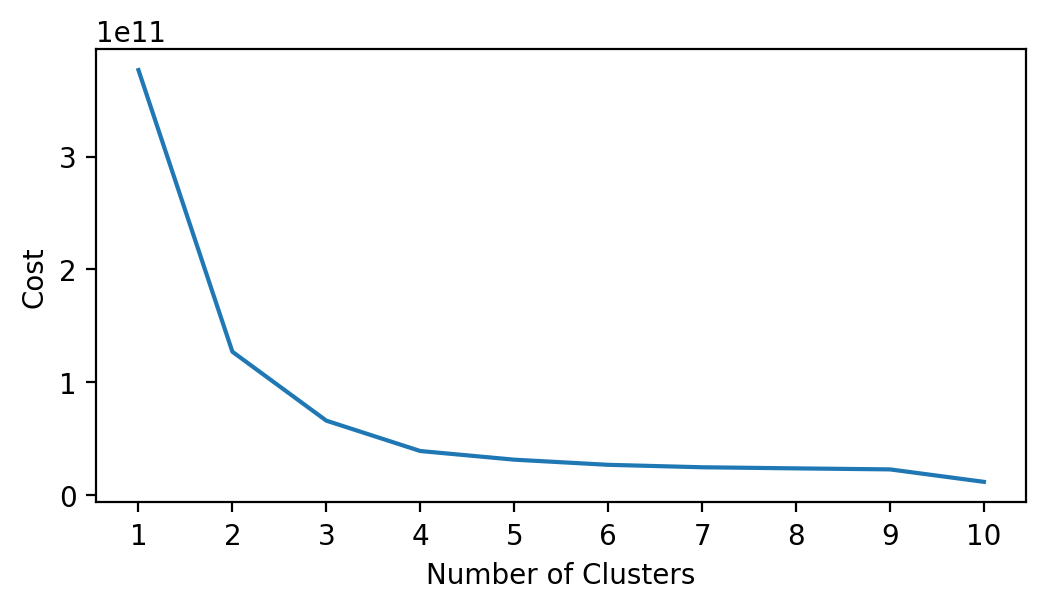

In [33]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), costs)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

In [44]:
cluster_data['cluster1'] = clusters_assigned[0]
cluster_data['cluster2'] = clusters_assigned[1]
cluster_data['cluster3'] = clusters_assigned[2]
cluster_data['cluster4'] = clusters_assigned[3]
cluster_data['cluster5'] = clusters_assigned[4]
cluster_data['cluster6'] = clusters_assigned[5]
cluster_data['cluster7'] = clusters_assigned[6]
cluster_data['cluster8'] = clusters_assigned[7]
cluster_data['cluster9'] = clusters_assigned[8]
cluster_data['cluster10'] = clusters_assigned[9]
cluster_data

,review_score,price,room_type,nights_stayed,occupant_type,nationality,clusters1,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
1,7.0,1590.0,Triple Room,2,Family,Philippines,0,0,1,2,0,1,2,2,4,6,7
3,6.0,977.0,Deluxe Room,6,Solo traveler,Foreigner,0,0,1,2,0,1,2,4,2,7,1
4,7.0,1590.0,Triple Room,1,Family,Foreigner,0,0,1,2,0,1,2,2,4,6,7
5,7.0,2308.0,Family Room,5,Family,Philippines,0,0,1,2,0,0,1,2,4,4,7
7,7.0,2308.0,Family Room,2,Family,Philippines,0,0,1,2,0,0,1,2,4,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76495,1.0,2505.0,Superior Twin Room,1,Couple,Foreigner,0,0,1,2,1,0,1,0,0,4,8
76510,10.0,2912.0,Deluxe Twin Room,1,Family,Foreigner,0,0,1,2,1,0,3,0,0,1,8
76511,10.0,2651.0,Deluxe Double Room,1,Family,Philippines,0,0,1,2,1,0,3,0,0,1,8
76515,10.0,2651.0,Deluxe Double Room,4,Group,Foreigner,0,0,1,2,1,0,3,0,0,1,8


In [49]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster4'])
cluster_data_group = cluster_data_group.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster4,,,,,,
0,10.0,1887.0,Standard Double Room,1,Solo traveler,Philippines
1,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
2,10.0,6000.0,Dusit King Room,1,Family,Foreigner
3,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner


In [50]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster5'])
cluster_data_group = cluster_data_group.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster5,,,,,,
0,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
1,10.0,1887.0,Standard Double Room,1,Solo traveler,Philippines
2,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner
3,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
4,10.0,6000.0,Dusit King Room,1,Couple,Foreigner


In [51]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster6'])
cluster_data_group = cluster_data_group.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster6,,,,,,
0,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
1,10.0,1887.0,Standard Double Room,1,Couple,Foreigner
2,10.0,1385.0,Standard Double Room,1,Solo traveler,Philippines
3,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
4,10.0,6000.0,Dusit King Room,1,Family,Foreigner
5,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner


In [52]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster7'])
cluster_data_group = cluster_data_group.groupby('cluster7').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster7,,,,,,
0,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
1,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
2,8.0,1887.0,Standard Double Room,1,Solo traveler,Foreigner
3,10.0,6000.0,Dusit King Room,1,Couple,Foreigner
4,10.0,1385.0,Standard Double Room,1,Solo traveler,Philippines
5,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner
6,10.0,3532.0,Deluxe King Room,1,Couple,Foreigner


In [53]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster8'])
cluster_data_group = cluster_data_group.groupby('cluster8').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster8,,,,,,
0,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
1,10.0,3532.0,Superior King Room,1,Couple,Foreigner
2,10.0,1385.0,Standard Double Room,1,Solo traveler,Philippines
3,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner
4,10.0,1887.0,Standard Double Room,1,Solo traveler,Foreigner
5,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
6,10.0,6000.0,Dusit King Room,1,Couple,Foreigner
7,10.0,5179.0,Tower Deluxe Double or Twin Room,1,Family,Foreigner


In [54]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster9'])
cluster_data_group = cluster_data_group.groupby('cluster9').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster9,,,,,,
0,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Family,Foreigner
1,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner
2,10.0,6000.0,Dusit King Room,1,Couple,Foreigner
3,10.0,5179.0,Tower Deluxe Double or Twin Room,1,Family,Foreigner
4,10.0,1887.0,Standard Double Room,1,Couple,Foreigner
5,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
6,10.0,1385.0,Double Room,1,Solo traveler,Foreigner
7,10.0,1276.0,Standard Double Room,1,Solo traveler,Philippines
8,10.0,3532.0,Superior King Room,1,Couple,Foreigner


In [55]:
# Inspect the characteristics of chosen cluster
cluster_data_group = cluster_data.filter(['review_score','price','room_type','nights_stayed','occupant_type','nationality','cluster10'])
cluster_data_group = cluster_data_group.groupby('cluster10').agg(pd.Series.mode)
cluster_data_group

,review_score,price,room_type,nights_stayed,occupant_type,nationality
cluster10,,,,,,
0,10.0,4250.0,Deluxe King Room,1,Family,Foreigner
1,10.0,1385.0,Standard Double Room,1,Solo traveler,Philippines
2,10.0,3532.0,Superior King Room,1,Couple,Foreigner
3,10.0,10800.0,Fairmont King Room - Non-Smoking,1,Couple,Foreigner
4,10.0,5179.0,Tower Deluxe Double or Twin Room,1,Family,Foreigner
5,10.0,6000.0,Dusit King Room,1,Couple,Foreigner
6,10.0,7200.0,Superior King Room with City View,1,Family,Foreigner
7,8.0,1887.0,Standard Double Room,1,Solo traveler,Foreigner
8,10.0,3055.0,Double or Twin Room,1,Couple,Foreigner


CLUSTER SET 2
Features:
1. price
2. occupant_type
3. nationality

In [60]:
cluster_data2 = data2.copy()
cluster_data2 = cluster_data2.filter(['price','nights_stayed','occupant_type','nationality'])
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          57851 non-null  float64
 1   nights_stayed  57851 non-null  int32  
 2   occupant_type  57851 non-null  object 
 3   nationality    57851 non-null  object 
dtypes: float64(1), int32(1), object(2)
memory usage: 2.0+ MB


In [62]:
#K-protoype clustering
from kmodes.kprototypes import KPrototypes

costs2=[]
n_clusters2 = []
clusters_assigned2 = []

for i in tqdm(range(1,11)):
    try:
        kproto2 = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters2 = kproto2.fit_predict(cluster_data2, categorical=[2,3])
        costs2.append(kproto2.cost_)
        n_clusters2.append(i)
        clusters_assigned2.append(clusters2)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|                                                                                                        | 0/10 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 376680484520.24774
Init: initializing centroids
Init: initializing clusters
Starting iterat

 10%|█████████▌                                                                                      | 1/10 [00:57<08:40, 57.87s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1510, ncost: 128419343462.86371
Run: 1, iteration: 2/100, moves: 844, ncost: 127131496991.83916
Run: 1, iteration: 3/100, moves: 180, ncost: 127067112760.28032
Run: 1, iteration: 4/100, moves: 0, ncost: 127067112760.28032
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 8117, ncost: 135507782961.03152
Run: 2, iteration: 2/100, moves: 1976, ncost: 128422499686.77545
Run: 2, iteration: 3/100, moves: 845, ncost: 127131496991.83916
Run: 2, iteration: 4/100, moves: 180, ncost: 127067112760.28032
Run: 2, iteration: 5/100, moves: 0, ncost: 127067112760.28032
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1510, ncost: 128419343462.86371
Run: 3, iteration: 2/100, moves: 844, ncost:

 20%|███████████████████                                                                            | 2/10 [04:00<17:29, 131.22s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7343, ncost: 89638414474.98714
Run: 1, iteration: 2/100, moves: 5224, ncost: 78590256042.63635
Run: 1, iteration: 3/100, moves: 1644, ncost: 77951471439.16898
Run: 1, iteration: 4/100, moves: 83, ncost: 77950807928.69211
Run: 1, iteration: 5/100, moves: 0, ncost: 77950807928.69211
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 7667, ncost: 94810859504.48224
Run: 2, iteration: 2/100, moves: 2759, ncost: 86994969807.69667
Run: 2, iteration: 3/100, moves: 3220, ncost: 78373488862.28693
Run: 2, iteration: 4/100, moves: 1152, ncost: 77950983771.87741
Run: 2, iteration: 5/100, moves: 43, ncost: 77950807928.69211
Run: 2, iteration

 30%|████████████████████████████▌                                                                  | 3/10 [07:39<19:59, 171.40s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5730, ncost: 51258165096.81547
Run: 1, iteration: 2/100, moves: 3425, ncost: 42058898904.12247
Run: 1, iteration: 3/100, moves: 1597, ncost: 39172362688.16778
Run: 1, iteration: 4/100, moves: 815, ncost: 39103096045.337875
Run: 1, iteration: 5/100, moves: 85, ncost: 39102683529.65784
Run: 1, iteration: 6/100, moves: 0, ncost: 39102683529.65784
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 13808, ncost: 84484132251.75226
Run: 2, iteration: 2/100, moves: 9942, ncost: 71323985771.78694
Run: 2, iteration: 3/100, moves: 10249, ncost: 61188815444.848045
Run: 2, iteration: 4/100, moves: 11524, ncost: 46764580100.83197
Run: 2, iteration: 5/100, moves: 5951, ncost: 42293294843.573906
Run: 2, iteration: 6/100, moves: 3277, ncost: 39233721491.95

 40%|██████████████████████████████████████                                                         | 4/10 [12:31<21:54, 219.13s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7533, ncost: 44123275858.39339
Run: 1, iteration: 2/100, moves: 3012, ncost: 36878579066.587395
Run: 1, iteration: 3/100, moves: 1706, ncost: 33643694064.81067
Run: 1, iteration: 4/100, moves: 422, ncost: 33570650194.247536
Run: 1, iteration: 5/100, moves: 70, ncost: 33569197125.083035
Run: 1, iteration: 6/100, moves: 0, ncost: 33569197125.083035
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 7736, ncost: 38608086084.32089
Run: 2, iteration: 2/100, moves: 2557, ncost: 33466214808.381664
Run: 2, iteration: 3/100, moves: 572, ncost: 33215393421.70852
Run: 2, iteration: 4/100, moves: 1740, ncost: 31597694778.58018
Run: 2, iteration: 5/100, moves: 931, ncost: 31440763952.71702
Run: 2

 50%|███████████████████████████████████████████████▌                                               | 5/10 [16:40<19:08, 229.77s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7221, ncost: 36029103813.21826
Run: 1, iteration: 2/100, moves: 2092, ncost: 32606269789.019352
Run: 1, iteration: 3/100, moves: 1582, ncost: 30022739693.06096
Run: 1, iteration: 4/100, moves: 2252, ncost: 29542380557.407948
Run: 1, iteration: 5/100, moves: 1720, ncost: 29010989590.234745
Run: 1, iteration: 6/100, moves: 2738, ncost: 27109205130.503555
Run: 1, iteration: 7/100, moves: 727, ncost: 27010432643.508686
Run: 1, iteration: 8/100, moves: 107, ncost: 27010270946.439518
Run: 1, iteration: 9/100, moves: 38, ncost: 27010246475.57278
Run: 1, iteration: 10/100, moves: 0, ncost: 27010246475.57278
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, it

 60%|█████████████████████████████████████████████████████████                                      | 6/10 [22:13<17:39, 264.98s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10297, ncost: 31146745415.267395
Run: 1, iteration: 2/100, moves: 3510, ncost: 27929149791.50438
Run: 1, iteration: 3/100, moves: 3710, ncost: 25529087421.736607
Run: 1, iteration: 4/100, moves: 1150, ncost: 25359804295.595974
Run: 1, iteration: 5/100, moves: 97, ncost: 25359466424.50208
Run: 1, iteration: 6/100, moves: 5, ncost: 25359466056.652916
Run: 1, iteration: 7/100, moves: 0, ncost: 25359466056.652916
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters

 70%|██████████████████████████████████████████████████████████████████▌                            | 7/10 [27:31<14:06, 282.07s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14625, ncost: 43211398416.671814
Run: 1, iteration: 2/100, moves: 11730, ncost: 32504317111.10033
Run: 1, iteration: 3/100, moves: 9188, ncost: 27389072489.684948
Run: 1, iteration: 4/100, moves: 5986, ncost: 24242523820.121765
Run: 1, iteration: 5/100, moves: 3557, ncost: 24000020982.306984
Run: 1, iteration: 6/100, moves: 3151, ncost: 23869726461.24715
Run: 1, iteration: 7/100, moves: 1797, ncost: 23818679039.970776
Run: 1, iteration: 8/100, moves: 1627, ncost: 23783699894.461536
Run: 1, iteration: 9/100, moves: 270, ncost: 23782682459.65702
Run: 1, iteration: 10/100, moves: 103, ncost: 23782553220.650036
Run: 1, iteration: 11/100, moves: 0, ncost: 23782553220.650036
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing 

 80%|████████████████████████████████████████████████████████████████████████████                   | 8/10 [30:18<08:11, 245.70s/it]

Can't cluster with 8 clusters
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6891, ncost: 29816732870.191216
Run: 1, iteration: 2/100, moves: 7346, ncost: 26416396749.009003
Run: 1, iteration: 3/100, moves: 8273, ncost: 23497689121.90925
Run: 1, iteration: 4/100, moves: 3472, ncost: 23300752062.074547
Run: 1, iteration: 5/100, moves: 3932, ncost: 23211228586.09831


 90%|█████████████████████████████████████████████████████████████████████████████████████▌         | 9/10 [30:42<02:56, 176.08s/it]

Can't cluster with 9 clusters
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22901, ncost: 30187032541.453457
Run: 1, iteration: 2/100, moves: 7655, ncost: 23174991013.114166
Run: 1, iteration: 3/100, moves: 2387, ncost: 22846938211.46208
Run: 1, iteration: 4/100, moves: 681, ncost: 22737840320.539207
Run: 1, iteration: 5/100, moves: 55, ncost

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 9926, ncost: 25668953558.563484
Run: 9, iteration: 2/100, moves: 7225, ncost: 22717447742.27048
Run: 9, iteration: 3/100, moves: 2857, ncost: 22570361767.46234
Run: 9, iteration: 4/100, moves: 1025, ncost: 22540372252.083282
Run: 9, iteration: 5/100, moves: 141, ncost: 22536458571.882313
Run: 9, iteration: 6/100, moves: 148, ncost: 22530221069.951576
Run: 9, iteration: 7/100, moves: 376, ncost: 22515993773.104797
Run: 9, iteration: 8/100, moves: 25, ncost: 22515974775.320667
Run: 9, iteration: 9/100, moves: 0, ncost: 22515974775.320667
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Ini

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [38:25<00:00, 230.59s/it]


In [64]:
costs2

[376680484520.24774,
 127067112760.28032,
 69857743295.08093,
 39102683529.65784,
 31438344187.088543,
 26875599297.930733,
 17305247627.780674,
 22515344881.476337]

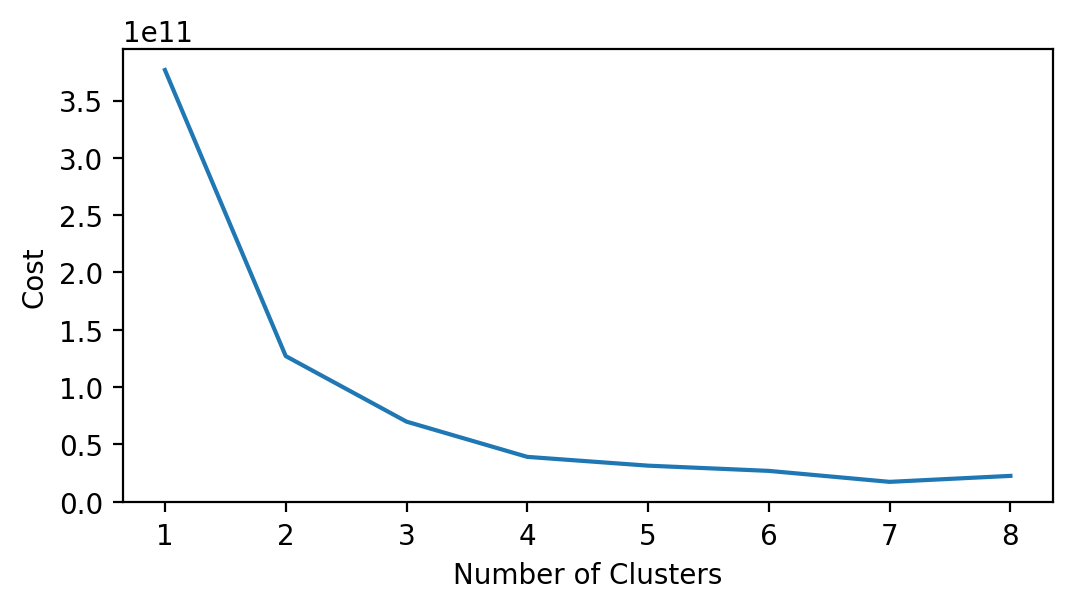

In [67]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 9), costs2)

# Format plot
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [68]:
cluster_data2['cluster1'] = clusters_assigned2[0]
cluster_data2['cluster2'] = clusters_assigned2[1]
cluster_data2['cluster3'] = clusters_assigned2[2]
cluster_data2['cluster4'] = clusters_assigned2[3]
cluster_data2['cluster5'] = clusters_assigned2[4]
cluster_data2['cluster6'] = clusters_assigned2[5]
cluster_data2['cluster7'] = clusters_assigned2[6]
cluster_data2['cluster8'] = clusters_assigned2[7]
# cluster_data2['cluster9'] = clusters_assigned2[8]
# cluster_data2['cluster10'] = clusters_assigned2[9]
cluster_data2

,price,nights_stayed,occupant_type,nationality,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
1,1590.0,2,Family,Philippines,0,0,2,3,0,3,1,4
3,977.0,6,Solo traveler,Foreigner,0,0,2,3,0,3,1,7
4,1590.0,1,Family,Foreigner,0,0,2,3,0,3,1,4
5,2308.0,5,Family,Philippines,0,0,2,3,4,2,0,2
7,2308.0,2,Family,Philippines,0,0,2,3,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
76495,2505.0,1,Couple,Foreigner,0,0,2,1,4,2,0,2
76510,2912.0,1,Family,Foreigner,0,0,2,1,4,5,0,5
76511,2651.0,1,Family,Philippines,0,0,2,1,4,5,0,5
76515,2651.0,4,Group,Foreigner,0,0,2,1,4,5,0,5


In [69]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster4'])
cluster_data_group2 = cluster_data_group2.groupby('cluster4').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster4,,,
0,10800.0,Family,Foreigner
1,3055.0,Couple,Foreigner
2,6000.0,Family,Foreigner
3,1887.0,Solo traveler,Philippines


In [71]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster5'])
cluster_data_group2 = cluster_data_group2.groupby('cluster5').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster5,,,
0,1887.0,Solo traveler,Philippines
1,7200.0,Family,Foreigner
2,6000.0,Couple,Foreigner
3,10800.0,Family,Foreigner
4,3055.0,Couple,Foreigner


In [72]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster6'])
cluster_data_group2 = cluster_data_group2.groupby('cluster6').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster6,,,
0,6000.0,Family,Foreigner
1,10800.0,Family,Foreigner
2,1887.0,Couple,Foreigner
3,1385.0,Solo traveler,Philippines
4,7200.0,Family,Foreigner
5,3055.0,Couple,Foreigner


In [73]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster7'])
cluster_data_group2 = cluster_data_group2.groupby('cluster7').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster7,,,
0,3055.0,Couple,Foreigner
1,1887.0,Solo traveler,Philippines
2,6000.0,Couple,Foreigner
3,10800.0,Couple,Foreigner
4,16055.0,Family,Foreigner
5,4250.0,Family,Foreigner
6,7200.0,Family,Foreigner


In [74]:
# Inspect the characteristics of chosen cluster
cluster_data_group2 = cluster_data2.filter(['price','occupant_type','nationality','cluster8'])
cluster_data_group2 = cluster_data_group2.groupby('cluster8').agg(pd.Series.mode)
cluster_data_group2

,price,occupant_type,nationality
cluster8,,,
0,10800.0,Family,Foreigner
1,6000.0,Couple,Foreigner
2,1887.0,Couple,Foreigner
3,7200.0,Family,Foreigner
4,1385.0,Solo traveler,Foreigner
5,3055.0,Couple,Foreigner
6,3532.0,Couple,Foreigner
7,1276.0,Solo traveler,Philippines
8,4250.0,Couple,Foreigner


In [77]:
data2[['nationality','occupant_type']].value_counts()

nationality  occupant_type
Foreigner    Solo traveler    10799
             Couple           10197
Philippines  Couple            9417
             Solo traveler     7282
Foreigner    Family            6849
Philippines  Family            6729
Foreigner    Group             3542
Philippines  Group             3036
dtype: int64

In [78]:
data2['occupant_type'].unique()

array(['Family', 'Solo traveler', 'Group', 'Couple'], dtype=object)

# Visualization

In [ ]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
#Alice Plot
ax.plot(angles,alice, 'o-', color='g', linewidth=1, label='Alice')
ax.fill(angles, alice, alpha=0.25, color='g')
#Bob Plot
ax.plot(angles,bob, 'o-', color='orange', linewidth=1, label='Bob')
ax.fill(angles, bob, alpha=0.25, color='orange')
ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Set figure size
plt.figure(figsize=(6,3), dpi=200)

# Plot radar chart per cluster
for i in range(0,4):
  # Filter cluster
  cluster = grouped_data[i]

  # Create radar chart
  fig = px.line_polar(
      cluster, 
      r=cluster.values, 
      theta=cluster.index, 
      line_close=True,
      title=f"Cluster {i}"
      )
  fig.update_traces(fill='toself')

  # Show figure
  fig.show()

In [ ]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

fig = px.line_polar(reasons, r = 'value', theta = 'variable', color = 'Segment', line_close = True,
                    line_shape = 'linear', #or spline
                    hover_name = 'Segment',
                    markers = True,
                    direction = 'clockwise',
                    start_angle = 45,
                    title = "Lack of money seen as greatest barrier for the excluded segments"
                                       )
fig.update_traces(fill = 'toself')


fig.show()
                  

NameError: name 'embedding' is not defined

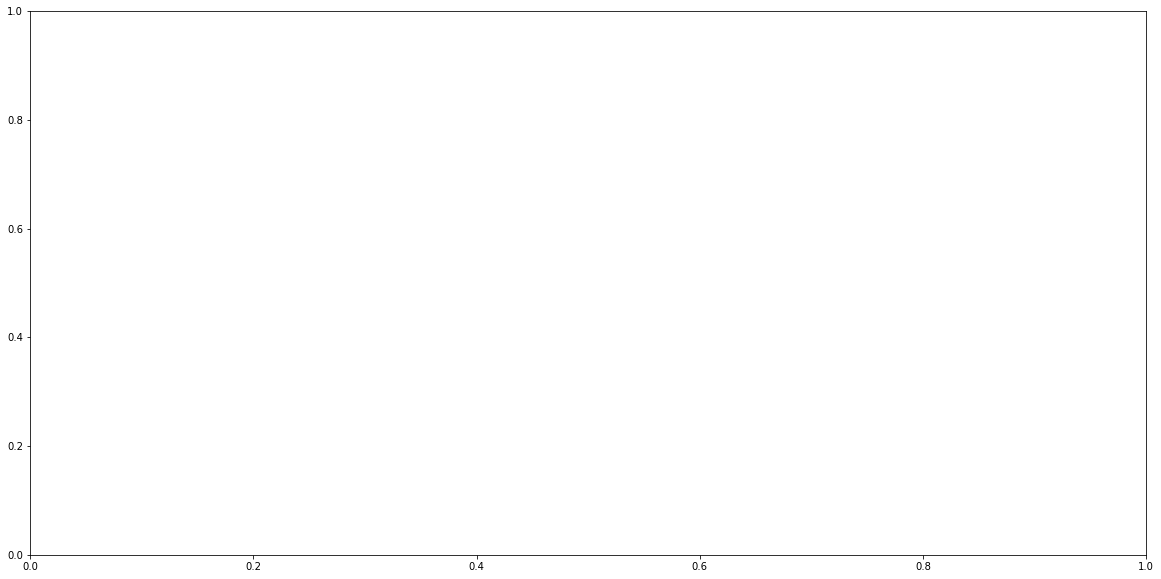

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=3),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# Evaluation

In [27]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, proto_clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

NameError: name 'LGBMClassifier' is not defined

# Shap

In [ ]:
clf_kp.fit(lgbm_data, proto_clusters)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)
shap.summary_plot(shap_values_kp, lgbm_data, plot_type="bar", plot_size=(15, 10))